# ***Multiple output Model***

# ***Wine Quality Prediction and Wine Type Classification***

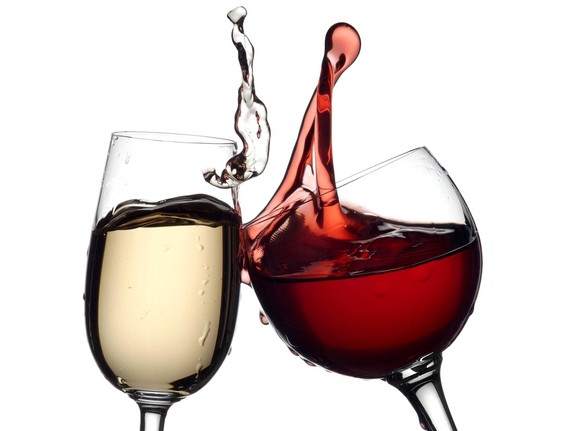

## ***importing libraries***

In [8]:
import tensorflow as tf
import tensorflow.keras as ks
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

## ***Loading white wine and red wine dataset and concatinating them***

In [9]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

white_df = pd.read_csv(URL, sep=';')
print(white_df.shape)
white_df['is_red'] = 0
white_df = white_df.drop_duplicates(keep='first')
print(white_df.shape)
white_df.head()

(4898, 12)
(3961, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [10]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

red_df = pd.read_csv(URL, sep=';')
print(red_df.shape)
red_df['is_red'] = 1
red_df = red_df.drop_duplicates(keep='first')
print(red_df.shape)
red_df.head()

(1599, 12)
(1359, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
df = pd.concat([red_df, white_df], ignore_index=True)
print(df.shape)
df.sample(5)

(5320, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
1520,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,0
4708,7.6,0.48,0.31,9.4,0.046,6.0,194.0,0.99714,3.07,0.61,9.4,5,0
3772,7.7,0.25,0.30,7.8,0.038,67.0,196.0,0.99555,3.10,0.50,10.1,5,0
3044,6.9,0.19,0.39,8.0,0.028,22.0,84.0,0.99400,3.11,0.66,10.8,6,0
1785,6.7,0.27,0.12,1.3,0.041,62.0,138.0,0.99210,3.21,0.42,10.0,6,0


### ***quality of wine visualization***

<AxesSubplot:>

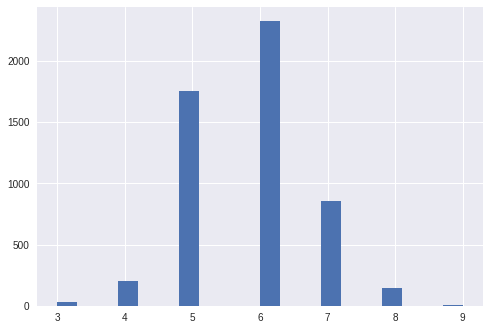

In [12]:
plt.style.use('seaborn')
df['quality'].hist(bins=20)

## ***as there are only a few number of samples in 3, 4, 8, 9 , let's kick it out from the dataset***

In [13]:
df = df[(df['quality'] > 4) & (df['quality'] < 8)]
df = df.reset_index(drop=True)

<AxesSubplot:>

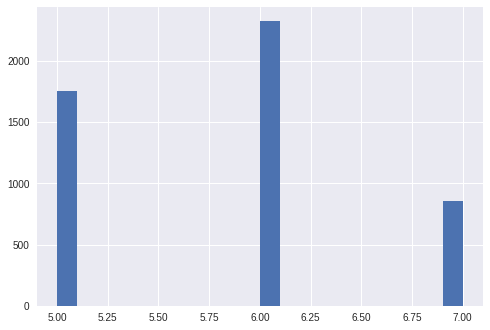

In [14]:
df['quality'].hist(bins=20)

## ***spliting the dataset into train and test set and further split it for validation***

In [15]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
train, validation = train_test_split(train, test_size=0.2, random_state=1)

In [16]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


## ***Lets seperate the independent variable from the dependent***

In [17]:
def format_output(data):
  is_red = data.pop('is_red')
  quality = data.pop('quality')
  is_red = np.array(is_red)
  quality = np.array(quality)
  return is_red, quality

train_y = format_output(train)
valid_y = format_output(validation)
test_y = format_output(test)

In [18]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

train_x = norm(train)
valid_x = norm(validation)
test_x = norm(test)

## ***creating the model***

In [19]:
def base_model(inputs):
  x = Dense(units=128, activation='relu', name='Dense_1')(inputs)
  x = Dense(units=128, activation='relu', name='Dense_2')(x)
  return x

def final_model(inputs):
  x = base_model(inputs)
  wine_quality = Dense(units='1', name='wine_quality')(x)
  wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)
  model = Model(inputs=inputs, outputs=[wine_type, wine_quality])
  return model

inputs = Input(shape=(11, ))
model = final_model(inputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 11)]         0                                            
__________________________________________________________________________________________________
Dense_1 (Dense)                 (None, 128)          1536        input_1[0][0]                    
__________________________________________________________________________________________________
Dense_2 (Dense)                 (None, 128)          16512       Dense_1[0][0]                    
__________________________________________________________________________________________________
wine_type (Dense)               (None, 1)            129         Dense_2[0][0]                    
______________________________________________________________________________________________

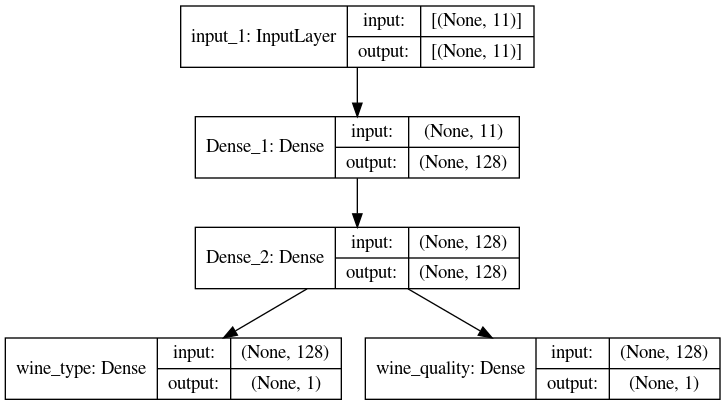

In [20]:
ks.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [21]:
model.compile(optimizer=ks.optimizers.RMSprop(lr=0.0001), loss={
    'wine_quality': 'mean_squared_error', 
    'wine_type': 'binary_crossentropy'
}, metrics={'wine_quality': ['RootMeanSquaredError'], 
            'wine_type': ['accuracy']
            })

In [22]:
history = model.fit(x=train_x, y=train_y, epochs=700, validation_data=(valid_x, valid_y), verbose=0)

In [23]:
for i in history.history:
  print(i)

loss
wine_type_loss
wine_quality_loss
wine_type_accuracy
wine_quality_root_mean_squared_error
val_loss
val_wine_type_loss
val_wine_quality_loss
val_wine_type_accuracy
val_wine_quality_root_mean_squared_error


### ***Let's see some visuals on how the model performs***

In [24]:
loss, wine_type_loss, wine_quality_loss, wine_type_accuracy, wine_quality_root_mean_squared_error = model.evaluate(test_x, test_y)

print(f'Loss = {loss}\nwine_type_loss = {wine_type_loss}\nwine_quality_loss = {wine_quality_loss}')
print(f'wine_type_accuracy = {wine_type_accuracy}\nwine_quality_rmse = {wine_quality_root_mean_squared_error}')

31/31 [==============================] - 0s 3ms/step - loss: 0.4349 - wine_type_loss: 0.0198 - wine_quality_loss: 0.4150 - wine_type_accuracy: 0.9990 - wine_quality_root_mean_squared_error: 0.6442
Loss = 0.43486684560775757
wine_type_loss = 0.01984497345983982
wine_quality_loss = 0.4150218367576599
wine_type_accuracy = 0.9989868402481079
wine_quality_rmse = 0.6442219018936157


In [25]:
def plot_metrics(metric_name, title, ylim=5):
  plt.style.use('ggplot')
  plt.figure(figsize=(7, 5))
  plt.plot(history.history[metric_name], color='blue', label=metric_name)
  plt.plot(history.history['val_'+metric_name], color='green', label='val_'+metric_name)
  plt.xlim(0, 3)
  plt.xlabel('epochs')
  plt.title(title)
  plt.legend()
  plt.show()

In [26]:
def conf_matrix(y_true, y_preds):
  cnf = confusion_matrix(y_true, y_preds)
  sns.heatmap(cnf, annot=True, fmt='g', cmap='Blues')
  plt.title('confusion_matrix for wine_type')

In [27]:
def plot_diff(y_true, y_preds, title=''):
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(7, 6))
  plt.scatter(y_true, y_preds)
  plt.title(title)
  plt.xlabel('True Value')
  plt.ylabel('predicted value')
  plt.axis('equal')
  plt.axis('square')
  plt.plot([-100, 100], [-100, 100])
  plt.show()

In [28]:
y_preds = model.predict(test_x)

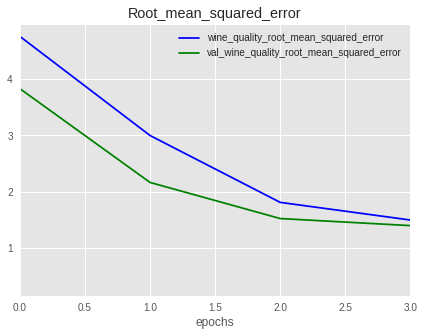

In [29]:
plot_metrics('wine_quality_root_mean_squared_error', 'Root_mean_squared_error')

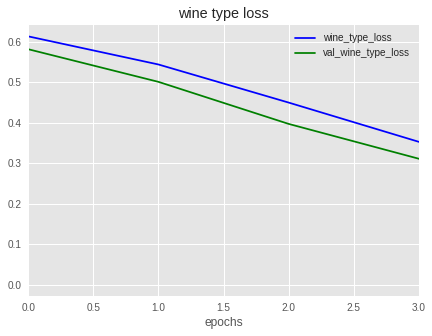

In [30]:
plot_metrics('wine_type_loss', 'wine type loss', ylim=7)

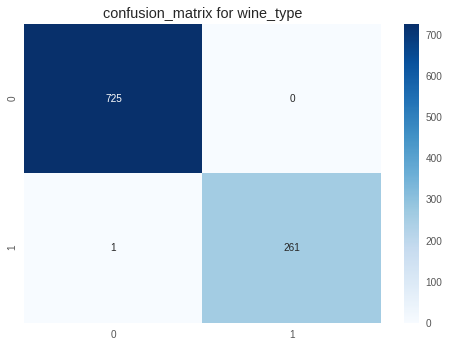

In [31]:
type_preds = np.round(y_preds[0])

conf_matrix(test_y[0], type_preds)

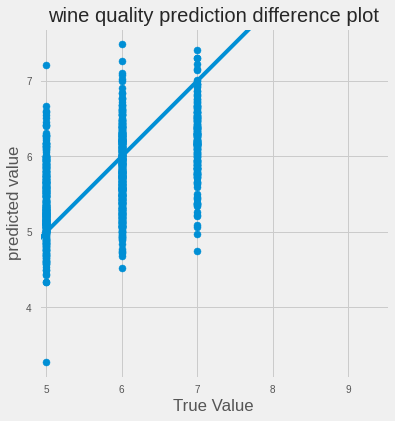

In [32]:
plot_diff(test_y[1], y_preds[1], title='wine quality prediction difference plot')